Tarea 5  Natali André Julio Beltran CC.1098807231       Brayan Alejandro Murillo González CC. 1007338060   
          

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pylab as plt
import pandas as pd

# Problemas 

#1. Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2\*np.pi, 2\*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)


SOLUCIÓN

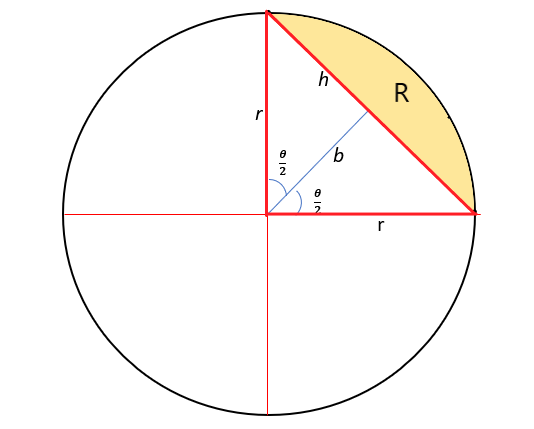

\begin{equation}
b=r\cos(\theta/2) \hspace{1cm}
h= r\sin(\theta/2)
\end{equation}

\begin{equation}
A_{triangulo}=2[\frac{r^2}{2}cos(\theta/2)sin(\theta/2)]=\frac{r^2 \sin(\theta)}{2}
\end{equation}

\begin{equation}
A_{sector\ circular}=\frac{r^2 \theta}{2}
\end{equation}

\begin{equation}
A_{total}=A_{sector\ circular}-A_{triangulo}=\frac{r^2}{2}(\theta-sin(\theta))
\end{equation}

\begin{equation}
A_{total}=\frac{\pi r^2}{4}=\frac{r^2}{2}(\theta-sin(\theta)
\end{equation}

\begin{equation}
f(\theta)=\theta-sin(\theta)-\frac{\pi}{2}=0\ (\ ecuacion\ trascendental)
\end{equation}





**Punto (b)**

In [2]:
"""Funcion para hallar el area del segmento R de la figura cuando f(θ)=πr^2/4  """
f = lambda θ : θ-np.sin(θ)-np.pi*0.5

"""Derivada de la funcion para el metodo de secante"""
fprim = lambda θ: 1-np.cos(θ)


**Puntos (c) y (d)**

In [3]:

θ=np.linspace(-2*np.pi,2*np.pi,1000) # Array con 1000 valores de theta entre -2π y 2π

""" Dataframe con los valores de θ y el area de la region R"""

df = pd.DataFrame()
df["Angulo"] = θ
df["Area"] = f(θ)


**Punto (f)**

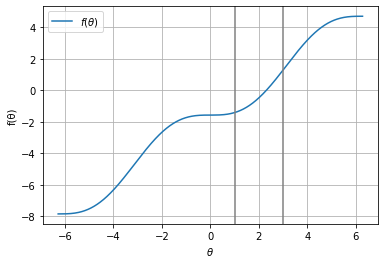

' El intervalo se encuentra entre θ=1 , θ=3'

In [4]:
""" Grafico de la ecuacion trascendental como funcion de θ para hallar las raices """

plt.figure()
plt.plot(df["Angulo"], df["Area"], label="$f(\\theta)$" )
plt.xlabel("$\\theta$")
plt.ylabel("f(θ)")
plt.axvline(x=1, color="gray") # Linea vertical para identificar el intervalo
plt.axvline(x=3,color="gray")
plt.legend()
plt.grid()
plt.show()


""" El intervalo se encuentra entre θ=1 , θ=3"""

**Puntos (g), (h), (i), (j)**

In [5]:
"""Raices mediante los distintos metodos"""

root = optimize.newton(f,2,fprime=None )   # Metodo de Newton
root1 = optimize.newton(f,2,fprime=fprim ) # Medoto de Secante
root2 = optimize.bisect(f,1,3)             # Metodo de Biseccion
#root3=optimize.fixed_point(f,2) No pude solucionar el problema de por que no encuentra la raiz con este método

"""Diccionario con los metodos empleados y sus respectivas raices"""
d = {"M.Newton":root, "M.Secant":root1, "M.bisect":root2}

# 2. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.

**Punto 0**

In [6]:
""" Parametros Iniciales """

v0 = 60                #Velocidad en m/s
alpha = np.pi          #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2               #rapidez del viento
b = 0.05               #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

params = (alpha,v0, b, u,g) # Tupla con los parametros iniciales

**Punto 1**

In [7]:


"""Funcion para la posicion en X """
def pos_x(t,*args):

  T1 = u*np.cos(alpha)*t
  T2 = (1./b)*(v0*np.cos(theta) - u*np.cos(alpha) )
  T3 = (1 - np.e**(-b*t))

  return T1+T2*T3

""" Funcion para la posicion en  Y """
def pos_y(t, *args):
 
  T1 = (1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha) ) #termino 1
  T2 = (1 - np.e**(- b * t)) #termino 2
  T3 = (g / b - u *  np.sin(alpha))*t #termino 3
  y = T1*T2-T3
  return y 



**Punto 2 y 3**

In [8]:
t = np.linspace(0,10,1000) # Array con mil datos entre 0 y 10 para el tiempo}

variables={"X":pos_x(t,params),"Y":pos_y(t,params),"Tiempo":t} # Diccionario con las claves de Posicion X, Posicion Y, Tiempo

""" Dataframe con los datos de Posicion X, Posicion Y, Tiempo """
df = pd.DataFrame(variables)
df

,X,Y,Tiempo
0,0.000000,0.000000,0.00000
1,0.424507,0.424092,0.01001
2,0.848652,0.846989,0.02002
3,1.272434,1.268694,0.03003
4,1.695854,1.689205,0.04004
...,...,...,...
995,269.391938,-81.678639,9.95996
996,269.532136,-82.190486,9.96997
997,269.672115,-82.703059,9.97998
998,269.811873,-83.216357,9.98999


**Punto 4**

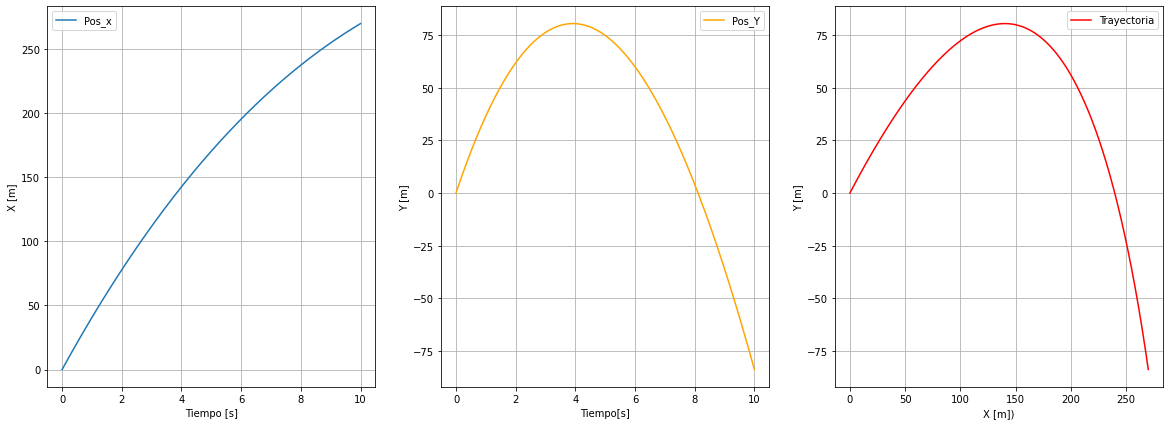

In [9]:

""" Grafica de la posicion X en funcion del tiempo """

plt.figure(figsize=(20,7)) # Tamaño de la grafica
plt.subplot(131)           # Para mostrar varias graficas
plt.plot(df["Tiempo"],df["X"],label="Pos_x")  # Puntos a graficar
plt.xlabel("Tiempo [s]")  # Nombre del eje x
plt.ylabel("X [m]")       # Nombre del eje y
plt.legend()
plt.grid()                # Cuadricula en la grafica

""" Grafica de la posicion Y en funcion del tiempo """
plt.subplot(132)
plt.plot(df["Tiempo"],df["Y"],label="Pos_Y",color="orange")
plt.xlabel("Tiempo[s]")
plt.ylabel("Y [m]")
plt.legend()
plt.grid()

""" Grafica de la trayectoria del proyectil """
plt.subplot(133)
plt.plot(df["X"],df["Y"],label="Trayectoria",color="red")
plt.xlabel("X [m])")
plt.ylabel("Y [m]")
plt.legend()
plt.grid()


**Punto 5**

In [10]:
""" El tiempo de vuelo corresponde a el valor de t en el que y=0, hay dos puntos en los que y vale 0, en t=0 y al final del vuelo"""


t_vuelo = optimize.newton(pos_y,8,fprime=None) # Igualando la funcion de pos_y=0 y hallando t con el metodo de newton encontramos el tiempo de vuelo

x_max = pos_x(t_vuelo)  # El alcance maximo en x corresponde a la funcion pos_x evaluada en t=t_vuelo

print("El alcance maximo en X es de : %f" %(x_max))




El alcance maximo en X es de : 239.606149


**Punto 6**

In [11]:

theta=np.arange(np.deg2rad(10),np.deg2rad(95),np.deg2rad(5)) # Array de valores de tetha entre 10° y 90 ° con un intervalo de 5°
t=np.linspace(0,20,1000) # Array de 1000 valores de t de 0 a 20


times=np.zeros(len(theta)) # Array para almacenar tiempos de vuelo variando el angulo inicial
xmax=np.zeros(len(theta))  # Array para almacenar distancias maximas variando el angulo inicial



""" Como se necesita variar theta de 10 a 90° se construye un ciclo for donde i toma los valores de theta y los remplaza en la funcion de pos_x y pos_y"""


""" En cada ciclo se iguala la pos_y con su respectivo theta, a 0, esto con el fin de hallar el tiempo de vuelo"""

""" Para hallar el X0 de los metodos de optimize.newton, se estima partiendo de el tiempo de vuelo suponiendo que no hay rozamiento del aire,
 cerca de este punto debe encontrarse la raiz buscada"""


count=-1 # Contador que indicara el indice para ir agregando los tiempos de vuelo: t_vuelo y x_max a los arrays times, xmax
for i in theta:
  count=count+1

  """Funcion pos_y donde i=θ0 ira variando"""
  def pos_y(t,*args):
    T1 = (1./b)*(g/b + v0*np.sin(i) - u*np.sin(alpha) ) #termino 1
    T2 = (1 - np.e**(- b * t)) #termino 2
    T3 = (g / b - u *  np.sin(alpha))*t #termino 3
    y =T1*T2-T3
    return (y)

  tv=2*v0*np.sin(i)/g # Tiempo de vuelo sin rozamiento
  t_vuelo=optimize.newton(pos_y,tv,args=(params)) # Tiempo de vuelo con un θ0 especifico
  times[count]=t_vuelo  # Se almacenan los tiempos de vuelo en un array

  """Funcion pos_x donde i=θ0 ira variando"""
  def pos_x(t,*args):
    T1=u*np.cos(alpha)*t
    T2=(1./b)*(v0*np.cos(i) - u*np.cos(alpha) )
    T3 = (1 - np.e**(-b*t))
    x=T1+T2*T3
    return x
    
  xmax[count]=pos_x(tv,params) # Se almacena el alcance maximo en un array, donde xmax es el valor de la funcion con el angulo expecifico evaluado en t_vuelo


d={"Angulo":np.rad2deg(theta),"xmax":xmax,"T_vuelo":times} # Diccionario con los angulos, alcances maximos y tiempos de vuelo
df=pd.DataFrame(d)
df



,Angulo,xmax,T_vuelo
0,10.0,115.918015,2.089913
1,15.0,162.709800,3.089693
2,20.0,200.760140,4.051319
3,25.0,229.485905,4.969343
4,30.0,248.597420,5.838759
5,35.0,258.075567,6.654990
6,40.0,258.144759,7.413869
7,45.0,249.243712,8.111627
8,50.0,231.995546,8.744883
9,55.0,207.178402,9.310630


' Se observa que a medida que crece θ llega a un punto de alcance maximo aproximadamente de 250, luego el viento empieza a arrastrar el\n proyectil haciendo que caiga cada vez mas atrás hasta que en 90 grados el proyectil cae mas atrás de donde se lanzo, en un  x negativo'

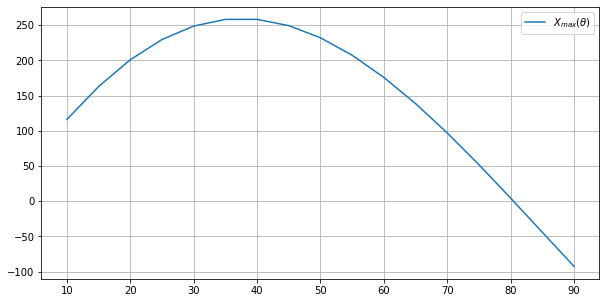

In [12]:
""" Grafica del alcance maximo en funcion de theta, matplotlib une los pares ordenados [θ,xmax] como una funcion continua pero son pares ordenados"""

plt.figure(figsize=(10,5))
plt.plot(df["Angulo"],df["xmax"],label=("$X_{max}(\\theta)$"))
plt.legend()
plt.xlabel=("$\\theta$")
plt.ylabel=("$X_{max}(\\theta)$")
plt.grid()

""" Se observa que a medida que crece θ llega a un punto de alcance maximo aproximadamente de 250, luego el viento empieza a arrastrar el
 proyectil haciendo que caiga cada vez mas atrás hasta que en 90 grados el proyectil cae mas atrás de donde se lanzo, en un  x negativo"""


**Punto 7**

         2
-0.1384 θ + 10.72 θ + 39.48


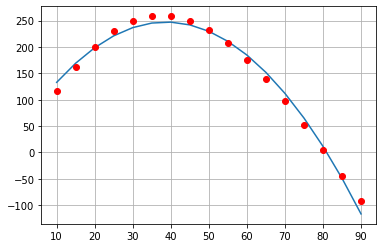

In [13]:


poli=np.polyfit(df["Angulo"],df["xmax"],deg=2) # Ajuste polinomial para los pares ordenados [θ,xmax], esta funcion devuelve los coeficientes en un polinomio de grado 2

poli=np.poly1d(poli,variable="θ") # Representacion polinomial de los valores de los coeficientes en un polinomio donde la variable es θ

print(poli)

"""Grafica del ajuste polinomial y los pares ordenados [θ,xmax], se observa que el polinomio se ajusta bien a todos los pares ordenados"""

plt.plot(df["Angulo"],poli(df["Angulo"]))
plt.plot(df["Angulo"],df["xmax"],"ro",color="red")
plt.grid()
